#### 📊 evaluate.ipynb

##### Libraries and environment

In [1]:
model_name = "cnn_mixup_cutout_SGD"

In [2]:
import sys
import os
# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
from utils.paths import MODELS_DIR, DATA_DIR, ARCHITECTURES_DIR

In [3]:
# CIFAR10-Torch-Classifier and config.py
from core.cifar10_classifier import CIFAR10Classifier
import config
import torch

##### Model & Config loading

In [4]:
config_path = os.path.join(MODELS_DIR, model_name,  f"{model_name}_config.json")
model_path = os.path.join(MODELS_DIR, model_name,  f"{model_name}_best_model.pth")

assert os.path.exists(config_path), f"Config not found at {config_path}"
assert os.path.exists(model_path), f"Model not found at {model_path}"

model = CIFAR10Classifier.load_model(
    model_name=model_name,
    config_path=config_path,
    model_path=model_path
)

model.summary()

Layer (type:depth-idx)                   Output Shape              Param #
CIFAR10_CNN                              [1, 10]                   --
├─Sequential: 1-1                        [1, 256, 2, 2]            --
│    └─Conv2d: 2-1                       [1, 32, 32, 32]           896
│    └─BatchNorm2d: 2-2                  [1, 32, 32, 32]           64
│    └─ReLU: 2-3                         [1, 32, 32, 32]           --
│    └─MaxPool2d: 2-4                    [1, 32, 16, 16]           --
│    └─Conv2d: 2-5                       [1, 64, 16, 16]           18,496
│    └─BatchNorm2d: 2-6                  [1, 64, 16, 16]           128
│    └─ReLU: 2-7                         [1, 64, 16, 16]           --
│    └─MaxPool2d: 2-8                    [1, 64, 8, 8]             --
│    └─Conv2d: 2-9                       [1, 128, 8, 8]            73,856
│    └─BatchNorm2d: 2-10                 [1, 128, 8, 8]            256
│    └─ReLU: 2-11                        [1, 128, 8, 8]            --
│   

📊 Training plot saved to c:\Users\pbori\Documents\ML AI Courses\Homework\CIFAR10_Torch_Classifier\models\cnn_mixup_cutout_SGD\cnn_mixup_cutout_SGD_metrics.png


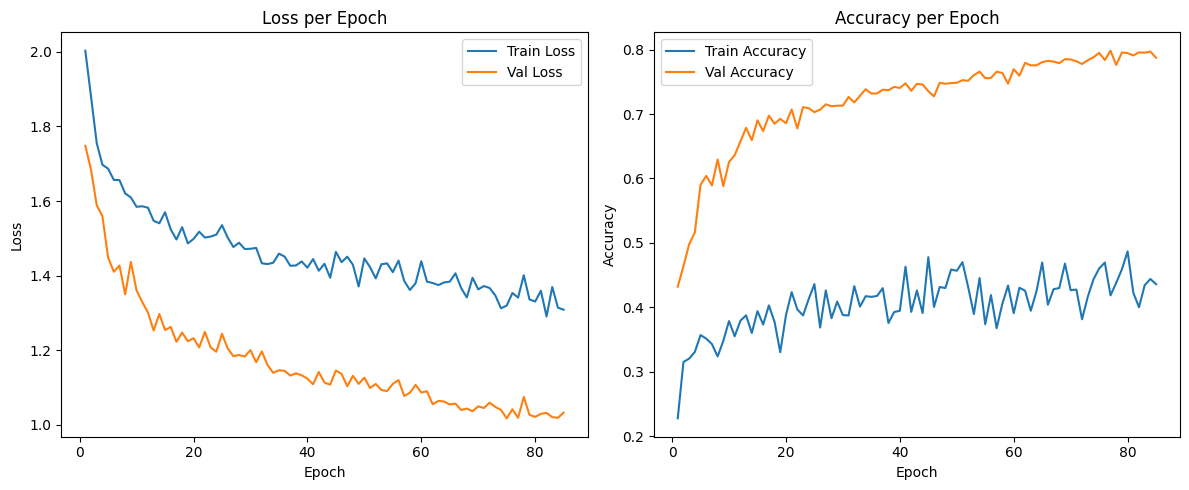

In [5]:
metrics_path = os.path.join(MODELS_DIR, model_name, f"{model_name}_metrics.json")
model.plot_training_history(metrics_path)

##### Test data loading

In [7]:
# data loading
from utils.data_utils import (
    get_transforms,
    load_cifar10_datasets, create_loaders
)

mean, std = torch.tensor(model.mean), torch.tensor(model.std)
# Apply transformations
full_transform = get_transforms(mean, std, augmentation=False, grayscale=model.grayscale)

# Load with transformations
_, test_dataset = load_cifar10_datasets(data_dir=DATA_DIR, transform=full_transform, subset="test")
# extract class names
class_names = test_dataset.classes

# Loaders
_, _, test_loader = create_loaders(_, _, test_dataset, batch_size=config.BATCH_SIZE)

🧪 Creating transform pipeline...
🧪 Transform pipeline:
  └─ Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
  └─ ToTensor()
  └─ Normalize(mean=[0.4913996756076813, 0.48215851187705994, 0.4465310275554657], std=[0.24703219532966614, 0.24348489940166473, 0.2615877091884613])
📥 Downloading/loading CIFAR-10 datasets to c:\Users\pbori\Documents\ML AI Courses\Homework\CIFAR10_Torch_Classifier\data... Loading test dataset
Files already downloaded and verified
✅ Loaded test samples: 10000
📦 Creating data loaders with batch size 256...
✅ Data loaders ready.


##### Metrics

In [8]:
metrics = model.evaluate(test_loader,verbose=True)

Validation loss: 0.9147, accuracy: 0.8357


##### Visualizations

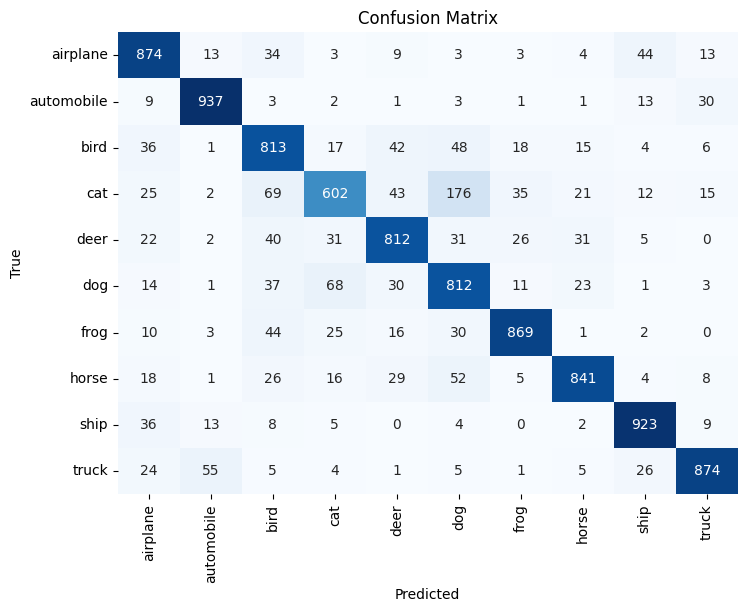

In [9]:
model.plot_confusion_matrix(metrics["y_pred"], metrics["y_true"], class_names=class_names)

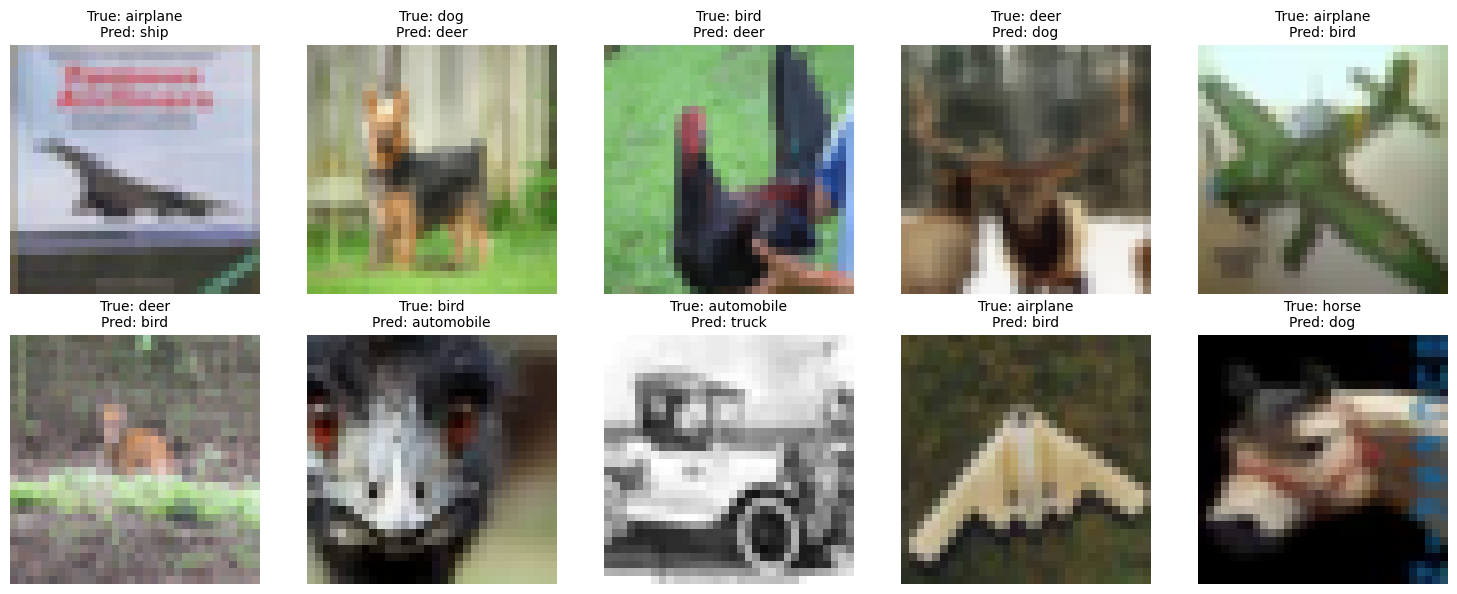

In [10]:
model.show_misclassified(data_loader=test_loader, class_names=class_names, max_images=10)

#### Predictions

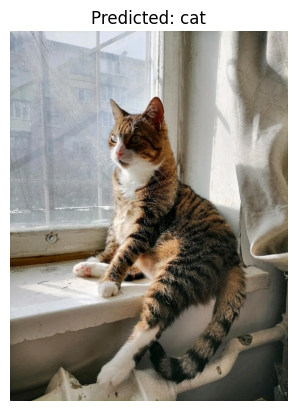

'cat'

In [11]:
# make prediction for a single image
image_path = os.path.join(DATA_DIR,"samples","Image20250601203635.jpg")
model.predict_image(path=image_path, transform=full_transform, class_names=class_names)


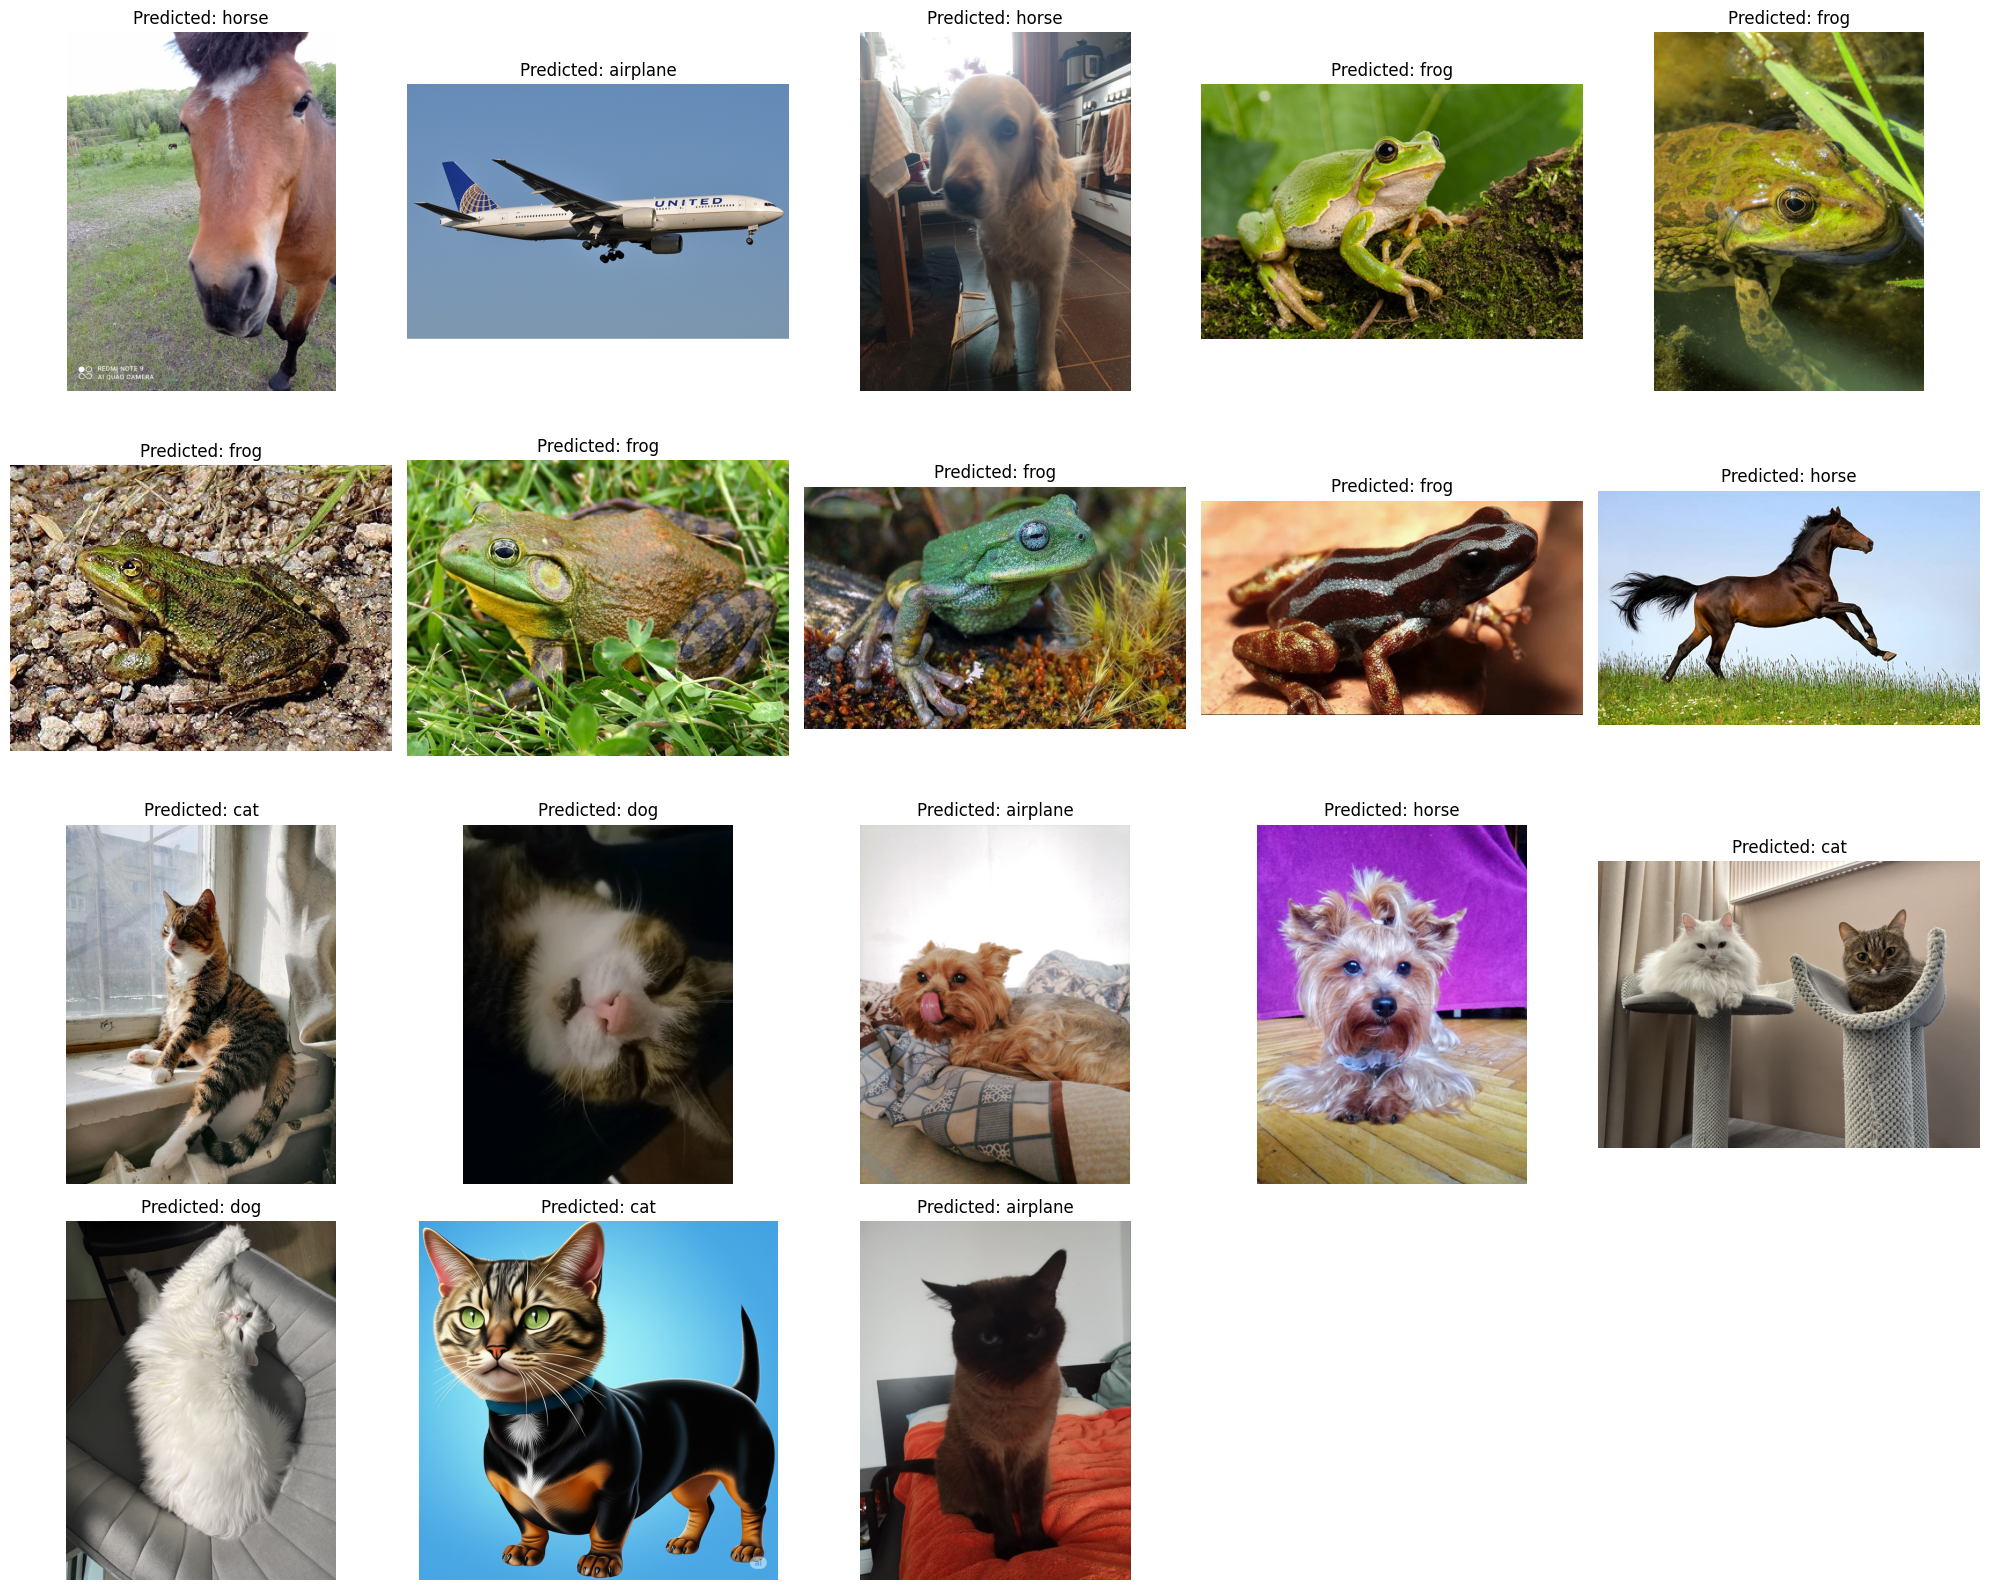

[('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\5323608996025860502.jpg',
  'horse'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\airplane.jpg',
  'airplane'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\Ayri.jpg',
  'horse'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\frog.jpg',
  'frog'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\frog2.jpg',
  'frog'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\frog3.jpg',
  'frog'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\frog4.jpg',
  'frog'),
 ('c:\\Users\\pbori\\Documents\\ML AI Courses\\Homework\\CIFAR10_Torch_Classifier\\data\\samples\\frog5.jpg',
  'frog'),
 ('c:\\User

In [12]:
# make prediction for a folder of images
images_path = os.path.join(DATA_DIR,"samples")
model.predict_images(directory=images_path, transform=full_transform, class_names=class_names)